## **Prerequisites**

### Step 1: Setup Azure Machine Learning Workspace via the portal. 
Note the workspace nane, resource group id, and subscription id

### Step 2: Create and populate a .env file in the home directory of this repository. 
Use this [.sample.env file](../.sample.env) as a guide. 

## **Setup Local Dev Environment**

### Step 1: Via the terminal run the following commands

```bash
conda env create --name llm_eval --file=../environment/conda.yaml
conda activate llm_eval
```

If you are not using VS Code you may need to run the following command to install the kernel

```bash
python -m ipykernel install --user --name llm_eval --display-name "llm_eval"
```

### Step 2: Download and install [PromptFlow for VS code](https://marketplace.visualstudio.com/items?itemName=prompt-flow.prompt-flow)

## **Create Azure Open AI Connection**
This connection will be used to access chat, completion and embedding models for both sample chat flows and flow evaluations

### Step 1: Create Open AI Service via Azure Portal
- Create a Deployment with the model of your chosing  
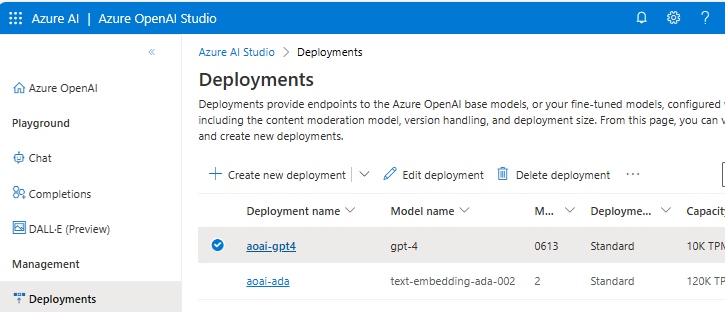  

- Populate your .env file with necessary keys and load into the environment (run the cell below)

In [21]:
# Load environment variables from .env file
import os
from dotenv import load_dotenv, find_dotenv

load_dotenv(find_dotenv(), override=True)
print(os.getenv("WORKSPACE_NAME"))
print(os.getenv("OPENAI_API_BASE"))

zs-aml
https://llm-eval-aoai.openai.azure.com/


### Step 2: Create AOAI connection to be used in PromptFlow

In [22]:
import subprocess

api_key = os.getenv("OPENAI_API_KEY")
api_base = os.getenv("OPENAI_API_BASE")
name = "aoai-connection"

command = f"pf connection create --file ../src/promptflow/connections/connect_aoai.yaml --set api_key={api_key} api_base={api_base} --name {name}"
result = subprocess.run(command,
                        shell=True,
                        check=True,
                        text=True,
                        capture_output=True
                        )

print(result.stdout)

{
    "name": "aoai-connection",
    "module": "promptflow.connections",
    "created_date": "2023-12-11T13:24:51.137301",
    "last_modified_date": "2023-12-12T12:01:59.478587",
    "type": "azure_open_ai",
    "api_key": "******",
    "api_base": "https://llm-eval-aoai.openai.azure.com/",
    "api_type": "azure",
    "api_version": "2023-07-01-preview"
}

